In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os


In [2]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

In [3]:
#Discriminator net
X = tf.placeholder(tf.float32, shape=[None, 784], name='X')

D_W1 = tf.Variable(xavier_init([784, 128]), name='D_W1')
D_b1 = tf.Variable(tf.zeros(shape=[128]), name='D_b1')

D_W2 = tf.Variable(xavier_init([128,1]), name='D_W2')
D_b2 = tf.Variable(tf.zeros(shape=[1]),  name='D_b2')

theta_D = [D_W1, D_W2, D_b1, D_b2]

In [4]:
#Generator net
Z = tf.placeholder(tf.float32, shape=[None, 100], name='Z')

G_W1 = tf.Variable(xavier_init([100,128]), name='G_W1')
G_b1 = tf.Variable(tf.zeros(shape=[128]), name='G_b2')

G_W2 = tf.Variable(xavier_init([128,784]), name='G_W2')
G_b2 = tf.Variable(tf.zeros(shape=[784]), name='G_b2')

theta_G = [G_W1, G_W2, G_b1, G_b2]

In [5]:
def sample_Z(m,n):
    return np.random.uniform(-1., 1., size=[m,n])

def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)
    return G_prob

def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)
    return D_prob, D_logit

In [11]:
def plot(samples):
    fig = plt.figure(figsize=(4,4))
    gs = gridspec.GridSpec(4,4)
    gs.update(wspace=0.05, hspace=0.05)
    
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28,28), cmap='Greys_r')
        
    return fig


In [7]:
G_sample = generator(Z)
D_real, D_logit_real = discriminator(X)
D_fake, D_logit_fake= discriminator(G_sample)

D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1-D_fake))
G_loss = -tf.reduce_mean(tf.log(D_fake))


In [8]:
#Update D(X) parameters
D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)

#Update G(Z) parameters
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

In [9]:
mb_size=128
Z_dim=100

mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('out/'):
    os.makedirs('out/')
    

Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz


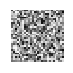

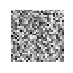

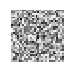

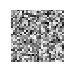

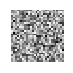

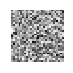

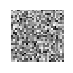

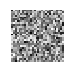

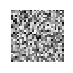

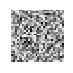

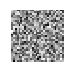

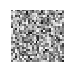

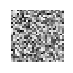

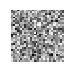

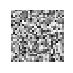

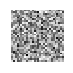

('Iter:', 0)
('D loss:', 1.7580192)
('G_loss:', 1.9970561)


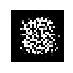

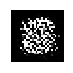

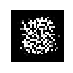

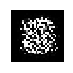

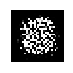

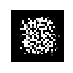

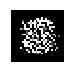

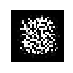

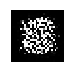

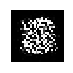

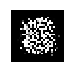

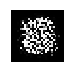

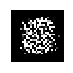

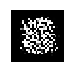

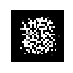

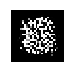

('Iter:', 1000)
('D loss:', 0.0081598191)
('G_loss:', 13.725193)


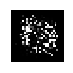

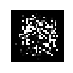

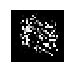

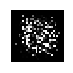

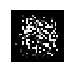

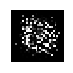

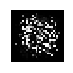

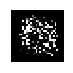

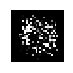

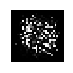

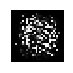

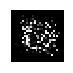

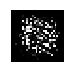

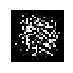

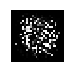

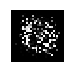

('Iter:', 2000)
('D loss:', 0.0069514802)
('G_loss:', 8.8652172)


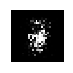

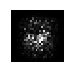

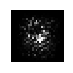

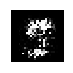

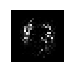

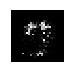

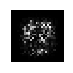

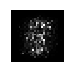

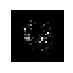

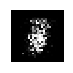

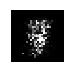

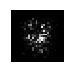

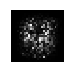

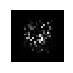

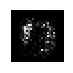

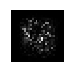

('Iter:', 3000)
('D loss:', 0.020095391)
('G_loss:', 5.0824928)


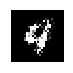

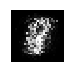

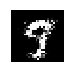

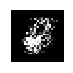

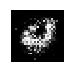

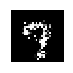

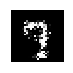

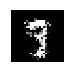

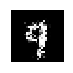

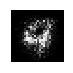

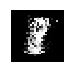

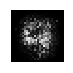

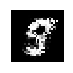

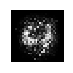

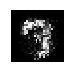

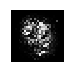

('Iter:', 4000)
('D loss:', 0.1030978)
('G_loss:', 5.1322265)


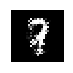

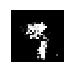

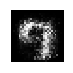

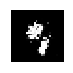

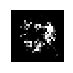

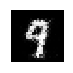

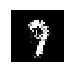

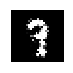

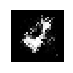

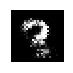

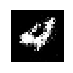

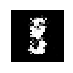

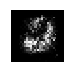

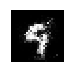

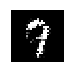

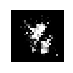

('Iter:', 5000)
('D loss:', 0.080586575)
('G_loss:', 6.2035847)


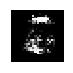

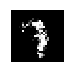

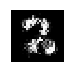

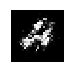

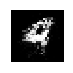

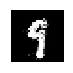

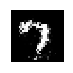

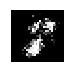

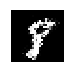

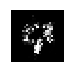

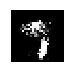

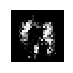

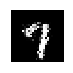

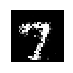

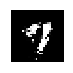

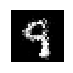

('Iter:', 6000)
('D loss:', 0.22509991)
('G_loss:', 5.2054472)


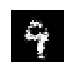

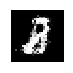

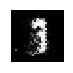

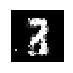

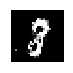

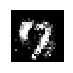

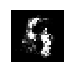

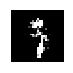

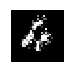

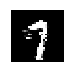

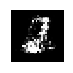

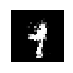

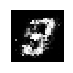

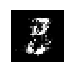

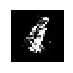

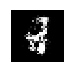

('Iter:', 7000)
('D loss:', 0.39646888)
('G_loss:', 3.8179767)


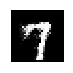

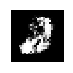

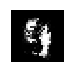

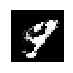

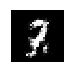

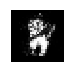

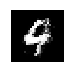

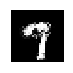

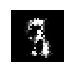

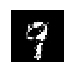

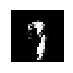

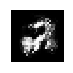

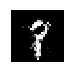

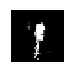

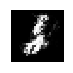

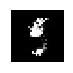

('Iter:', 8000)
('D loss:', 0.32910961)
('G_loss:', 3.629437)


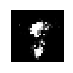

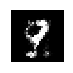

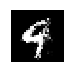

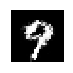

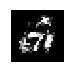

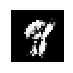

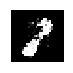

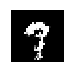

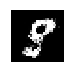

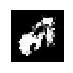

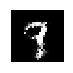

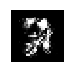

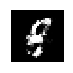

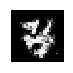

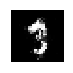

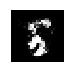

('Iter:', 9000)
('D loss:', 0.38277128)
('G_loss:', 4.2200365)


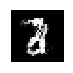

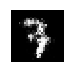

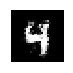

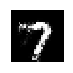

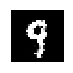

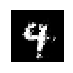

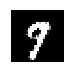

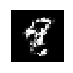

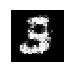

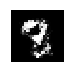

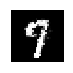

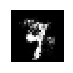

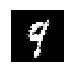

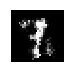

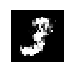

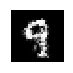

('Iter:', 10000)
('D loss:', 0.55348355)
('G_loss:', 3.2809453)


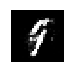

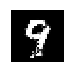

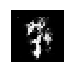

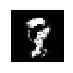

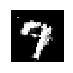

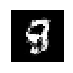

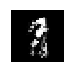

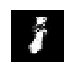

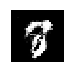

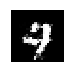

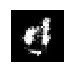

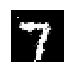

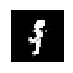

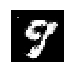

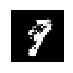

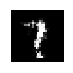

('Iter:', 11000)
('D loss:', 0.61724669)
('G_loss:', 2.9849892)


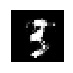

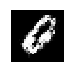

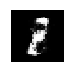

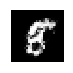

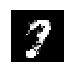

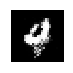

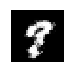

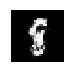

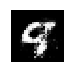

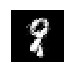

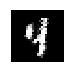

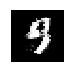

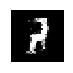

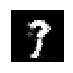

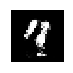

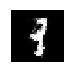

('Iter:', 12000)
('D loss:', 0.48252758)
('G_loss:', 2.4454801)


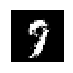

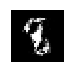

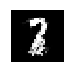

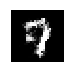

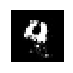

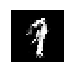

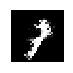

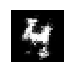

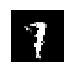

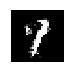

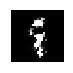

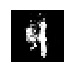

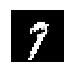

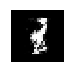

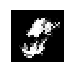

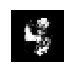

('Iter:', 13000)
('D loss:', 0.49257737)
('G_loss:', 2.9386029)


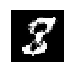

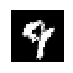

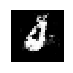

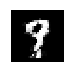

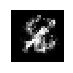

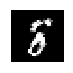

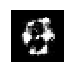

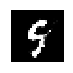

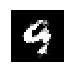

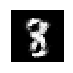

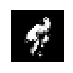

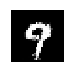

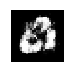

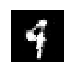

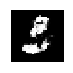

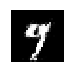

('Iter:', 14000)
('D loss:', 0.71945781)
('G_loss:', 2.4372282)


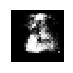

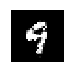

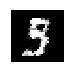

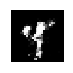

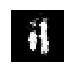

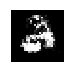

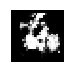

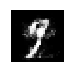

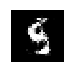

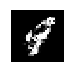

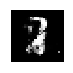

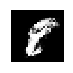

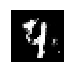

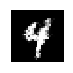

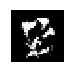

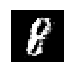

('Iter:', 15000)
('D loss:', 0.49447942)
('G_loss:', 2.3514061)


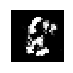

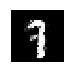

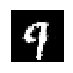

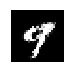

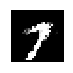

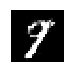

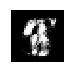

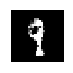

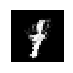

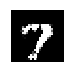

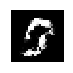

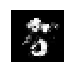

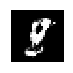

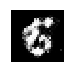

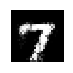

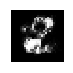

('Iter:', 16000)
('D loss:', 0.56674433)
('G_loss:', 2.1044061)


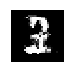

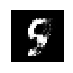

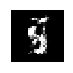

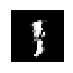

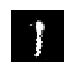

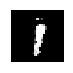

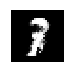

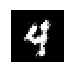

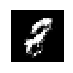

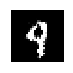

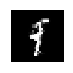

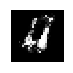

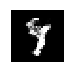

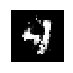

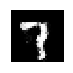

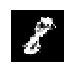

('Iter:', 17000)
('D loss:', 0.51484299)
('G_loss:', 2.0728047)


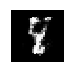

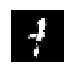

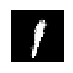

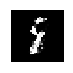

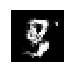

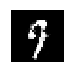

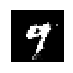

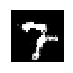

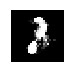

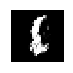

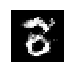

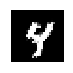

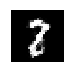

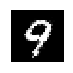

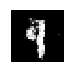

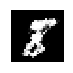

('Iter:', 18000)
('D loss:', 0.50010633)
('G_loss:', 2.626863)


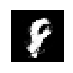

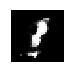

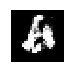

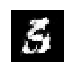

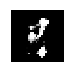

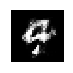

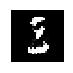

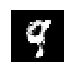

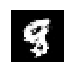

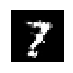

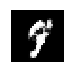

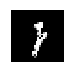

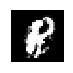

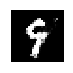

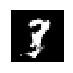

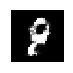

('Iter:', 19000)
('D loss:', 0.47180867)
('G_loss:', 2.3627877)


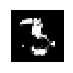

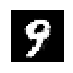

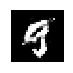

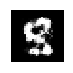

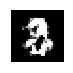

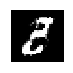

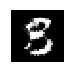

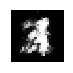

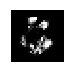

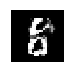

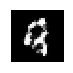

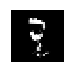

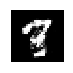

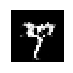

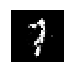

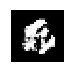

('Iter:', 20000)
('D loss:', 0.72780973)
('G_loss:', 2.1401286)


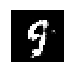

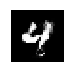

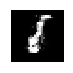

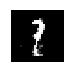

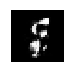

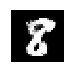

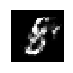

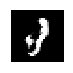

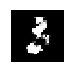

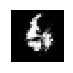

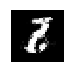

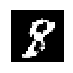

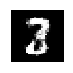

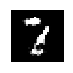

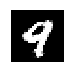

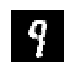

('Iter:', 21000)
('D loss:', 0.56001383)
('G_loss:', 2.6535468)


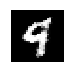

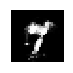

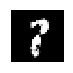

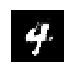

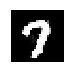

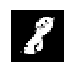

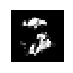

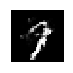

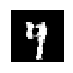

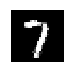

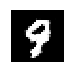

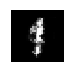

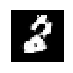

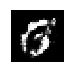

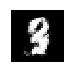

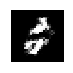

('Iter:', 22000)
('D loss:', 0.79353493)
('G_loss:', 2.6390293)


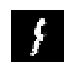

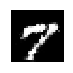

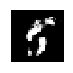

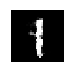

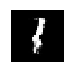

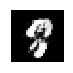

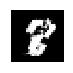

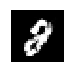

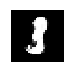

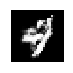

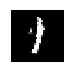

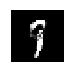

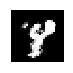

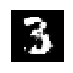

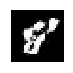

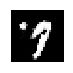

('Iter:', 23000)
('D loss:', 0.61687011)
('G_loss:', 2.218662)


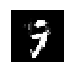

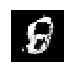

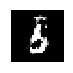

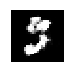

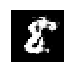

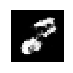

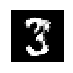

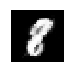

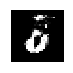

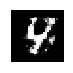

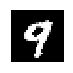

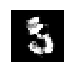

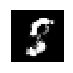

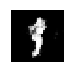

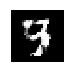

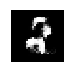

('Iter:', 24000)
('D loss:', 0.62991929)
('G_loss:', 2.2803366)


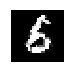

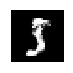

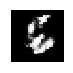

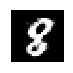

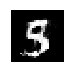

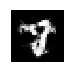

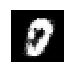

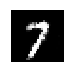

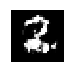

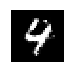

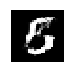

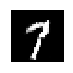

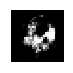

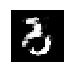

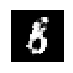

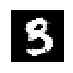

('Iter:', 25000)
('D loss:', 0.74741578)
('G_loss:', 2.2814715)


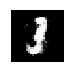

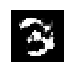

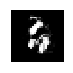

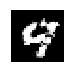

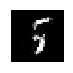

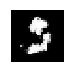

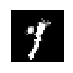

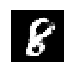

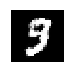

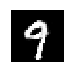

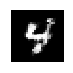

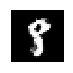

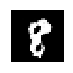

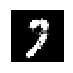

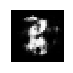

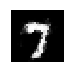

('Iter:', 26000)
('D loss:', 0.74583894)
('G_loss:', 2.1228044)


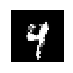

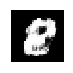

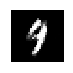

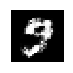

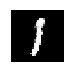

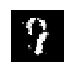

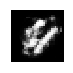

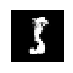

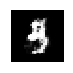

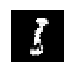

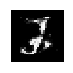

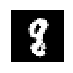

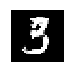

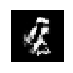

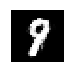

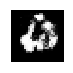

('Iter:', 27000)
('D loss:', 0.69573414)
('G_loss:', 2.2938685)


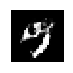

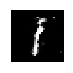

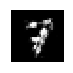

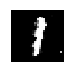

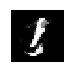

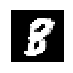

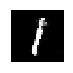

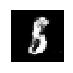

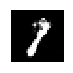

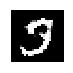

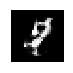

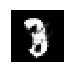

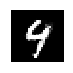

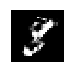

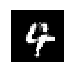

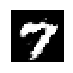

('Iter:', 28000)
('D loss:', 0.61622167)
('G_loss:', 2.2608018)


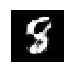

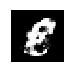

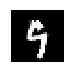

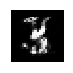

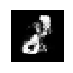

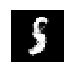

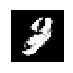

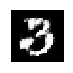

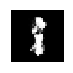

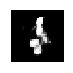

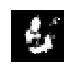

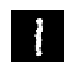

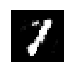

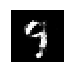

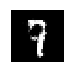

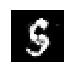

('Iter:', 29000)
('D loss:', 0.45885104)
('G_loss:', 2.1874511)


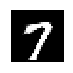

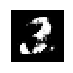

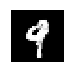

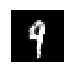

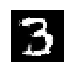

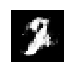

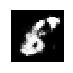

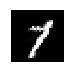

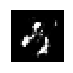

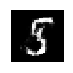

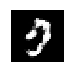

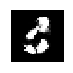

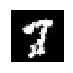

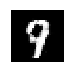

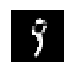

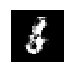

('Iter:', 30000)
('D loss:', 0.52160835)
('G_loss:', 2.0859156)


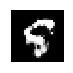

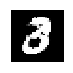

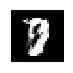

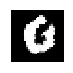

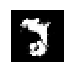

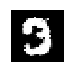

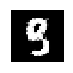

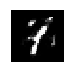

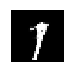

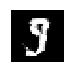

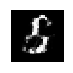

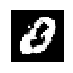

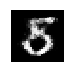

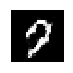

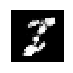

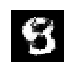

('Iter:', 31000)
('D loss:', 0.70681834)
('G_loss:', 2.4055886)


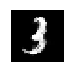

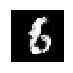

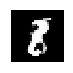

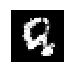

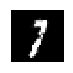

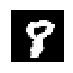

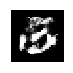

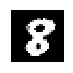

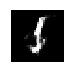

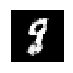

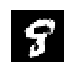

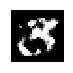

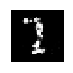

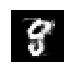

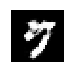

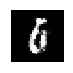

('Iter:', 32000)
('D loss:', 0.65583062)
('G_loss:', 3.0863407)


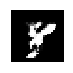

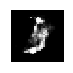

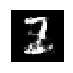

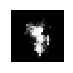

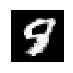

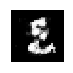

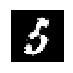

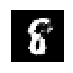

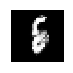

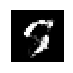

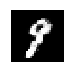

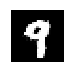

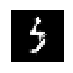

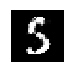

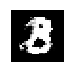

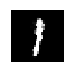

('Iter:', 33000)
('D loss:', 0.65630293)
('G_loss:', 2.5879648)


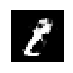

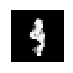

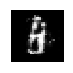

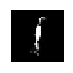

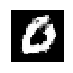

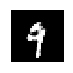

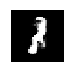

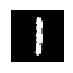

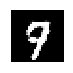

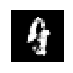

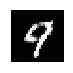

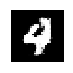

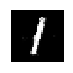

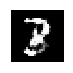

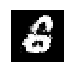

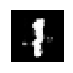

('Iter:', 34000)
('D loss:', 0.60430199)
('G_loss:', 2.6102219)


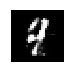

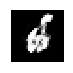

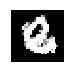

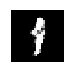

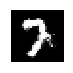

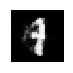

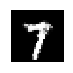

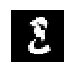

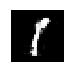

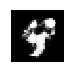

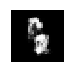

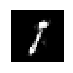

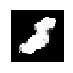

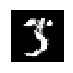

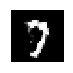

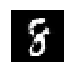

('Iter:', 35000)
('D loss:', 0.49775562)
('G_loss:', 2.8187933)


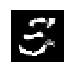

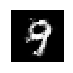

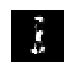

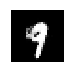

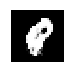

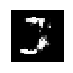

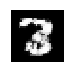

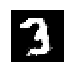

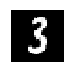

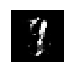

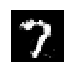

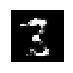

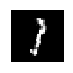

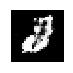

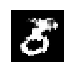

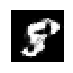

('Iter:', 36000)
('D loss:', 0.58096808)
('G_loss:', 2.8269222)


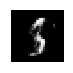

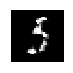

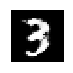

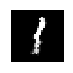

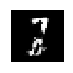

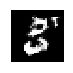

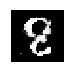

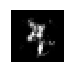

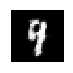

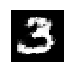

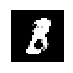

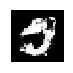

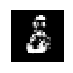

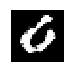

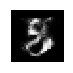

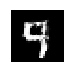

('Iter:', 37000)
('D loss:', 0.50528222)
('G_loss:', 2.73331)


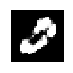

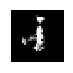

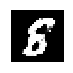

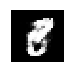

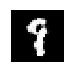

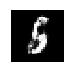

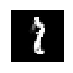

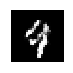

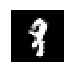

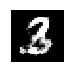

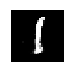

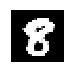

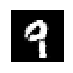

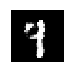

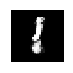

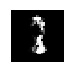

('Iter:', 38000)
('D loss:', 0.54655671)
('G_loss:', 2.7312229)


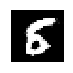

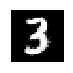

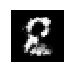

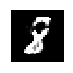

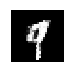

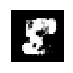

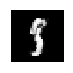

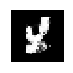

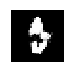

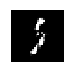

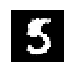

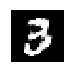

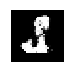

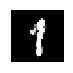

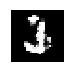

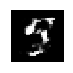

('Iter:', 39000)
('D loss:', 0.61333781)
('G_loss:', 2.5706735)


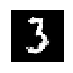

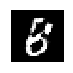

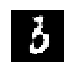

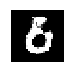

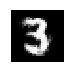

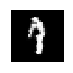

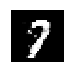

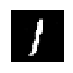

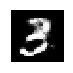

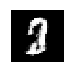

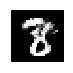

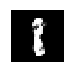

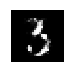

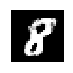

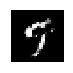

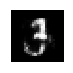

('Iter:', 40000)
('D loss:', 0.60660249)
('G_loss:', 2.8706234)


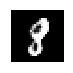

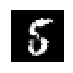

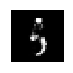

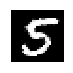

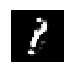

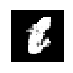

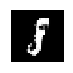

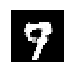

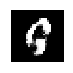

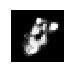

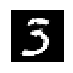

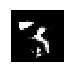

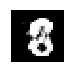

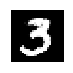

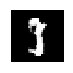

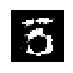

('Iter:', 41000)
('D loss:', 0.53411353)
('G_loss:', 2.5397127)


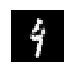

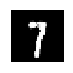

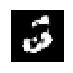

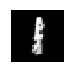

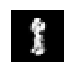

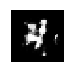

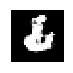

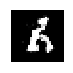

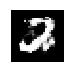

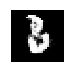

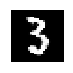

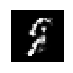

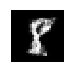

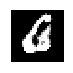

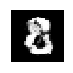

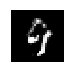

('Iter:', 42000)
('D loss:', 0.62318778)
('G_loss:', 2.862649)


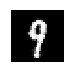

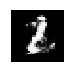

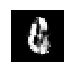

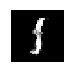

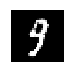

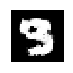

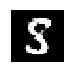

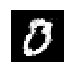

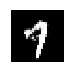

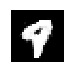

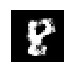

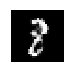

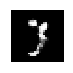

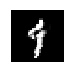

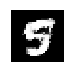

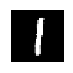

('Iter:', 43000)
('D loss:', 0.54873532)
('G_loss:', 2.5995417)


KeyboardInterrupt: 

In [10]:
#train Models
i = 0

for it in range(100000):
    if it % 1000 == 0:
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})
        fig = plot(samples)
        plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i += 1
        plt.close(fig)
        
    X_mb, _ = mnist.train.next_batch(mb_size)
    
    _,D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X:X_mb, Z:sample_Z(mb_size, Z_dim)})
    _,G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim)})
    
    if it % 1000 == 0:
        print('Iter:', it)
        print('D loss:', D_loss_curr)
        print('G_loss:', G_loss_curr)
        